# Визуализация

In [10]:
import pandas as pd

In [ ]:
df = pd.read_csv('Data.txt', sep=",", header = None, engine='python')

---

Импортируем всякого интересного:

In [12]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

---

### Небольшие махинации со столбцами:

In [24]:
df = df.rename(columns=df.iloc[0])

In [34]:
df = df.drop(index=[0])

In [37]:
df['Год'] = df['Год'].astype(int)

In [45]:
df['Цена(руб)'] = df['Цена(руб)'].astype(int)

---

### Полетели делать визуал:

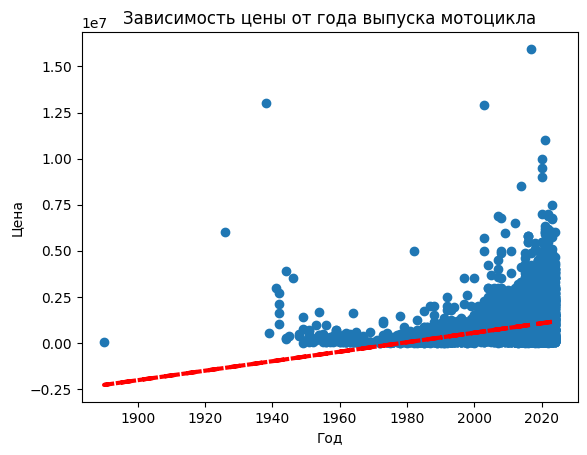

In [48]:
plt.scatter(df['Год'], df['Цена(руб)'])
z = np.polyfit(df['Год'], df['Цена(руб)'], 1 )
p = np.poly1d(z)
plt.plot(df['Год'], p(df['Год']), color="red", linewidth= 3 , linestyle="--")

plt.title('Зависимость цены от года выпуска мотоцикла')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

Вывод: чем новее мотоцикл, тем он дороже

---

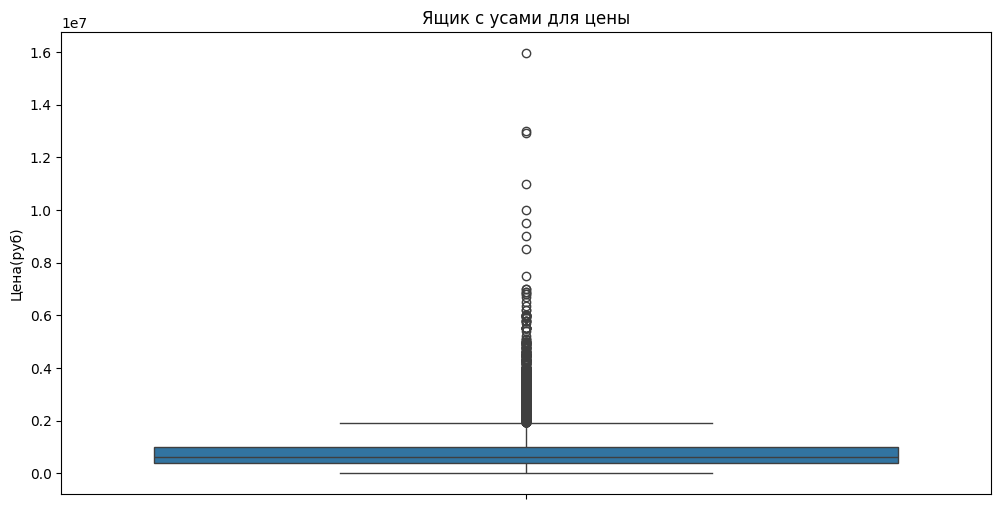

In [46]:
sns.boxplot(df["Цена(руб)"])  # сначала построим ящик с усами для пробега автомобиля
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.title('Ящик с усами для цены')
plt.show();

Вывод: В основном все цены сосредоточенны на одном уровне, однако среди данных присутствуют сильные выбросы.

---

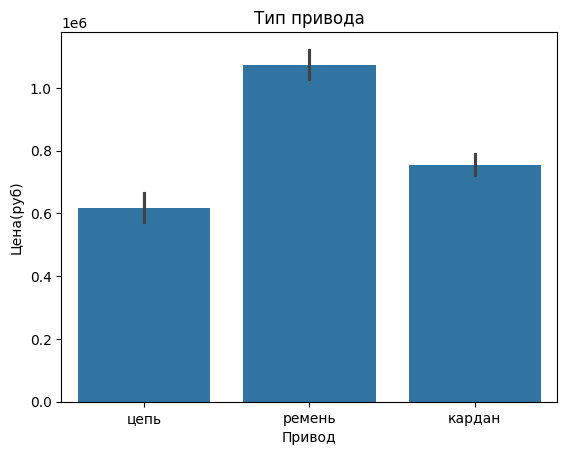

In [53]:
sns.barplot(x = 'Привод', y ='Цена(руб)', data = df, estimator = np.std)
plt.title('Тип привода');

Вывод: мотоциклы с приводом "ремень самые дорогие".

---

In [60]:
с = df[['Год', 'Пробег(км)', 'Объем двигателя (см³)', 'Мощность двигателя (л.с.)', 'Цилиндров', 'Цена(руб)']].corr()

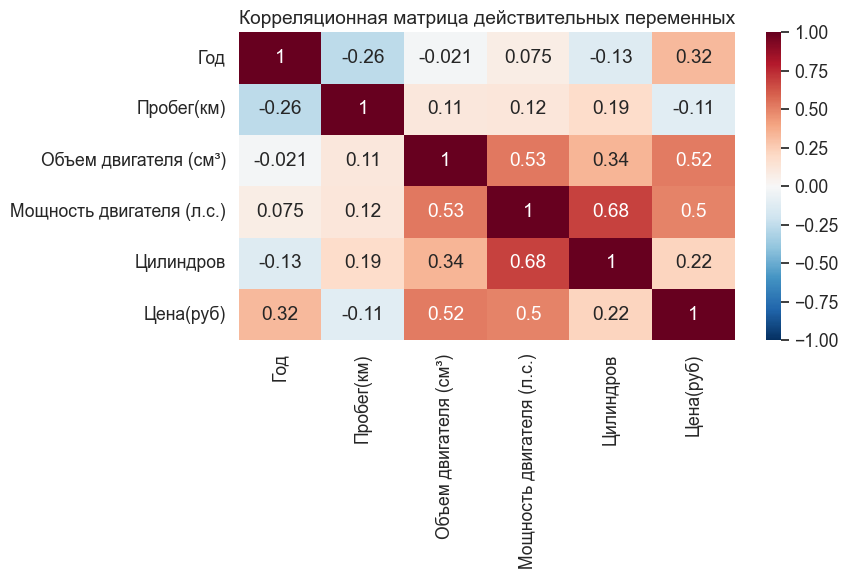

In [61]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
plt.title('Корреляционная матрица действительных переменных')
sns.heatmap(
    с,        
    cmap='RdBu_r',
    annot=True, 
    vmin=-1, vmax=1);

Вывод: самая сильная положительная взаимосвязь между мощностью двигателя и количеством цилиндров, мощностью двигателя и объёмом двигателя. Самая сильная отрицательная взаимосвязь между пробегом и годом выпуска, самая слабая связь по модулю между годом и объёмом двигателя.

---

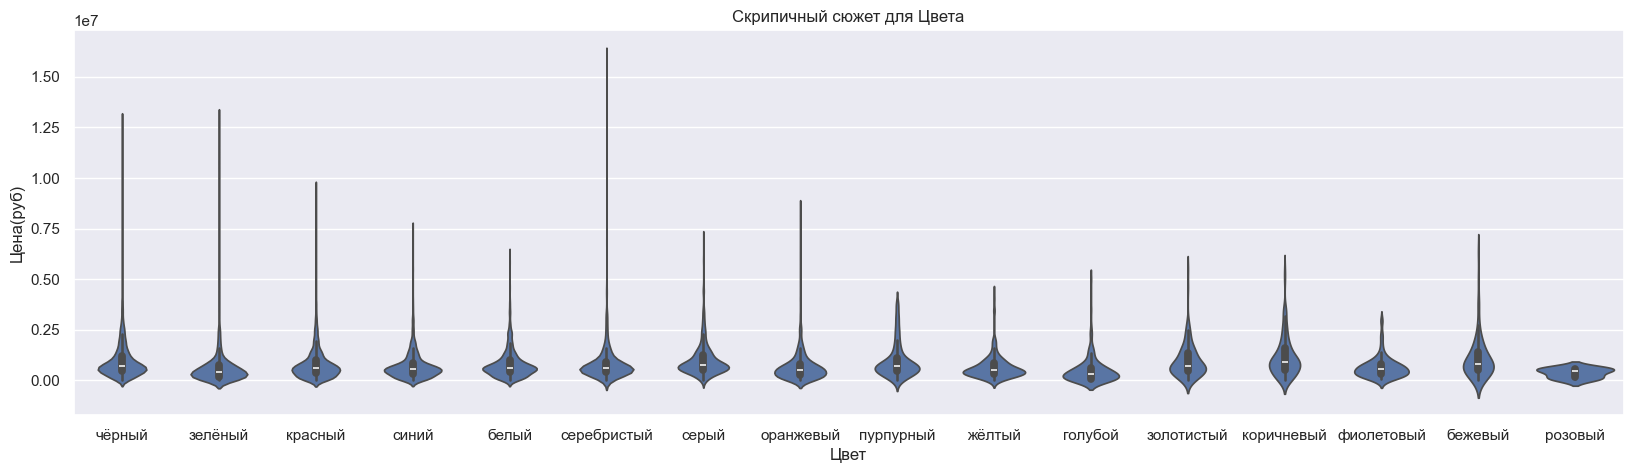

In [86]:
sns.violinplot(x='Цвет',y='Цена(руб)',data=df)
plt.title('Скрипичный сюжет для Цвета')
sns.set_theme(rc={'figure.figsize':(20,5)});

Вывод: в среднем цена от цвета не сильно зависит, однако есть цвета с очень сильными выбросами.

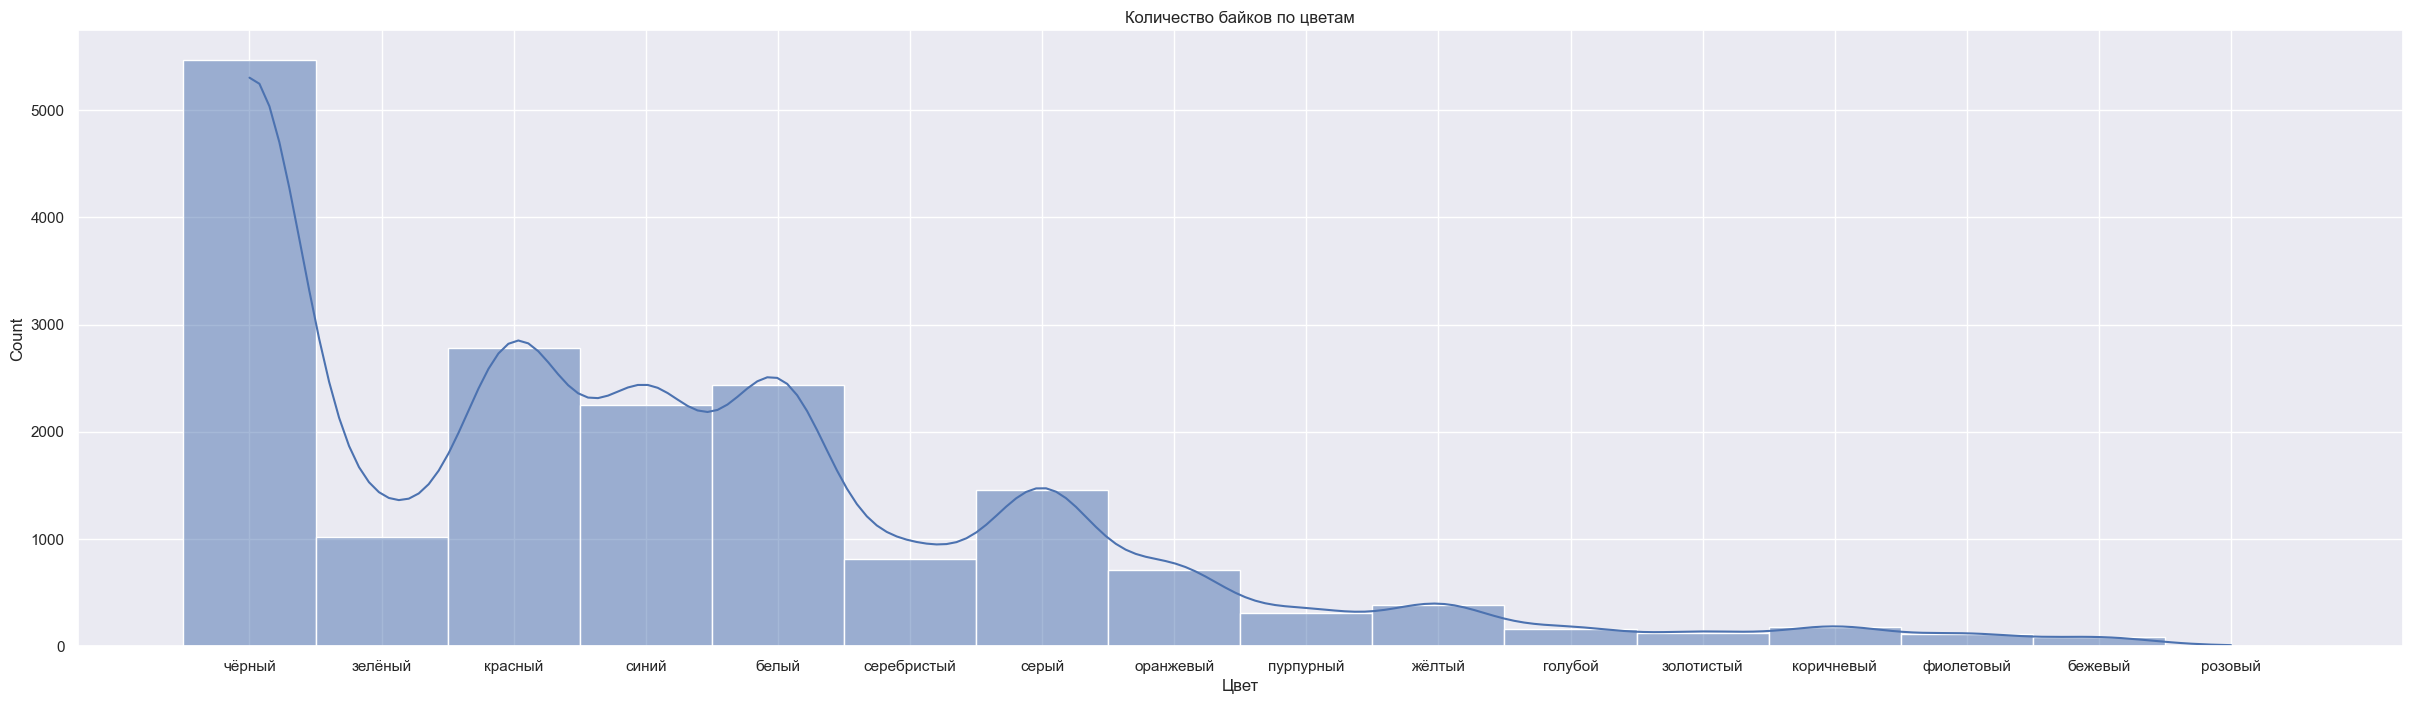

In [127]:
sns.histplot(x='Цвет',kde=True,data=df)
sns.set_theme(rc={'figure.figsize':(30,10)})
plt.title('Количество байков по цветам');

Самый популярный цвет мотоцикла - черный, наименее популярный - розовый.

---

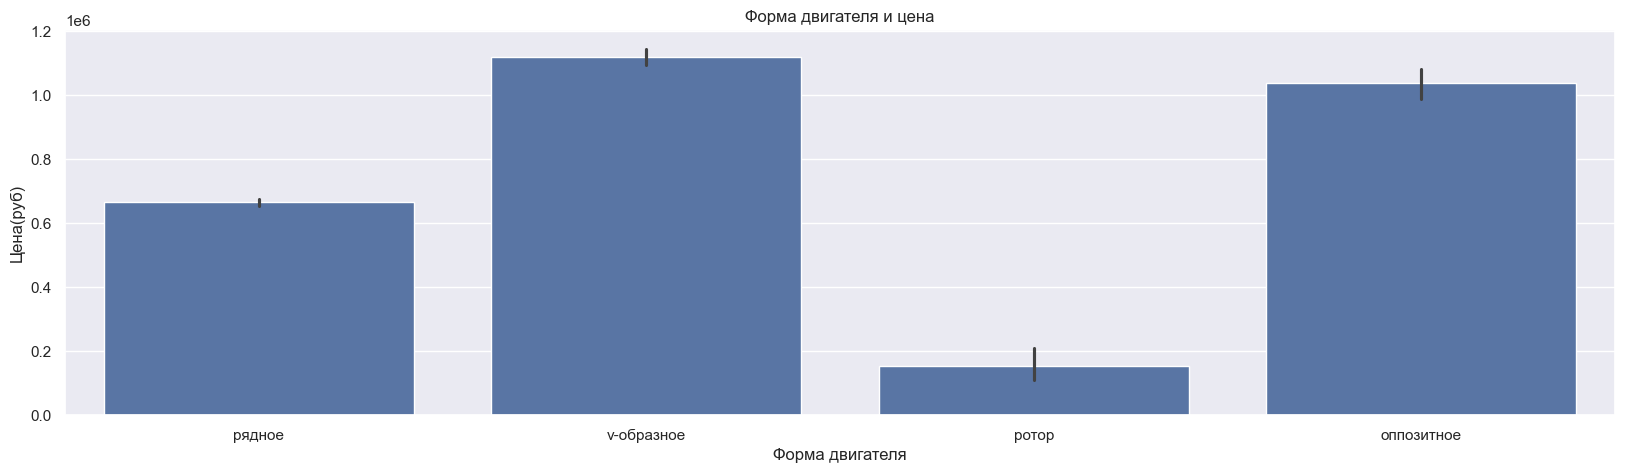

In [89]:
sns.barplot(x='Форма двигателя', y='Цена(руб)', data=df)
plt.title('Форма двигателя и цена');

Мотоциклы с V-образным мотором самые дорогие, а с роторным - самые дешевые.

---

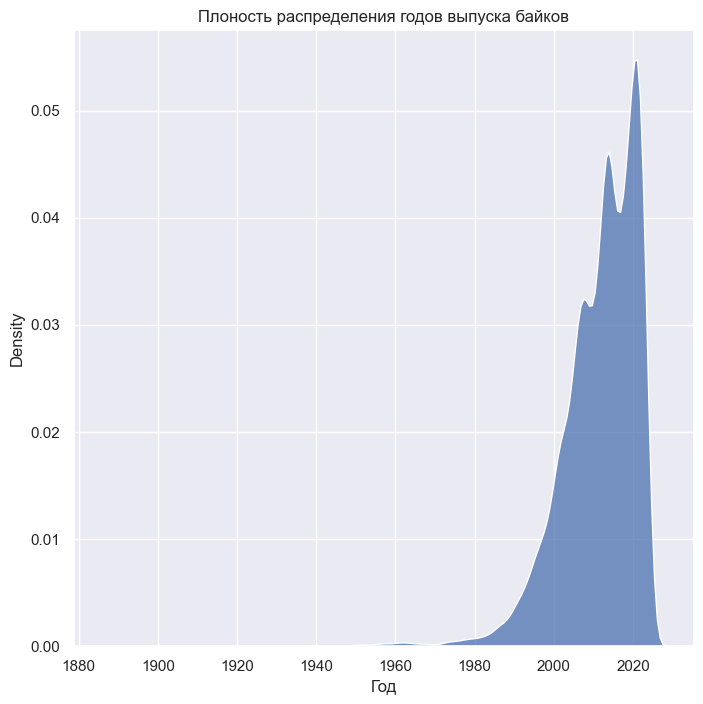

In [133]:
sns.kdeplot(x='Год',data=df,multiple='stack')
sns.set_theme(rc={'figure.figsize':(5,5)})
plt.title('Плоность распределения годов выпуска байков');

Вывод: в основном все байки новые - 2020-2021 года, но есть и совсем древние.

---

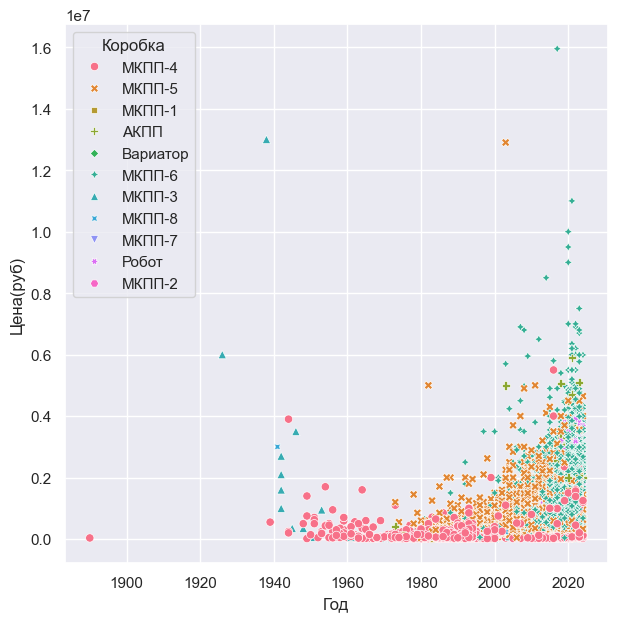

In [116]:
sns.scatterplot(x='Год',y='Цена(руб)',hue='Коробка',style='Коробка',data=df)
sns.set_theme(rc={'figure.figsize':(5,5)});

---

На последок глянем на 10 самых популярных городов по продаже мотоциклов

In [76]:
top10 = df['Город'].value_counts()[0:10]

In [77]:
top10

Город
Москва             6571
Владивосток        1946
Санкт-Петербург    1224
Екатеринбург        417
Красноярск          346
Краснодар           240
Иркутск             227
Новосибирск         193
Красногорск         183
Динская             135
Name: count, dtype: int64